In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/data_processed_train.csv')

In [5]:
candidate_cols = [
     'travel_date_dow',
     'o_purpose_category',
     'd_purpose_category',
     'num_non_hh_travelers',
     'num_hh_travelers',
     'num_travelers',
     'o_location_type',
     'd_location_type',
     'o_congestion',
     'd_congestion',
     'age',
     'employment',
     'student',
     'license',
     'planning_apps',
     'industry',
     'gender',
     'education',
     'survey_language',
     'num_bicycles',
     'num_vehicles',
     'res_type',
     'rent_own',
     'income_aggregate',
     'num_people',
     'num_adults',
     'num_kids',
     'num_workers',
     'num_students',
     'disability'
]


In [6]:
# covert string values to categorial codes
string_cols = ['survey_language', 'disability']
df[string_cols] = df[string_cols].astype('category')
df[string_cols] = df[string_cols].apply(lambda x: x.cat.codes)

## Feature importance regarding trip distance category
Calculate the mutual information between each feature and the `trip_distance_category`

In [10]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

X = df[candidate_cols].to_numpy()
y = df['trip_distance_category']
mutual_info = mutual_info_classif(X, y, discrete_features=True)

zipped = list(zip(candidate_cols, mutual_info))
zipped.sort(key=lambda x: x[1], reverse=True)
mutual_info_distance_df = pd.DataFrame(zipped, columns=['feature_name', 'mutual_information'])
mutual_info_distance_df

,feature_name,mutual_information
0,d_congestion,0.019314
1,d_purpose_category,0.017436
2,num_vehicles,0.016333
3,res_type,0.009415
4,o_purpose_category,0.006580
5,income_aggregate,0.005044
6,rent_own,0.004670
7,license,0.004557
8,num_travelers,0.003183
9,employment,0.002862


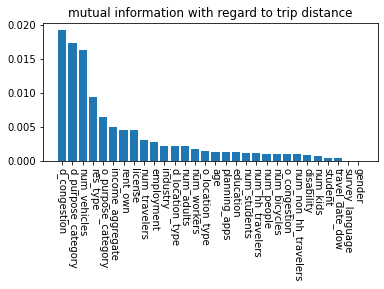

In [29]:

plt.bar(mutual_info_distance_df['feature_name'], mutual_info_distance['mutual_information'])
plt.xticks(rotation=270)
plt.title('mutual information with regard to trip distance')
plt.subplots_adjust(bottom=0.4)
plt.savefig('image/mutual_info_distance.eps')


## Feature importance regarding transport mode
Calculate the mutual information between each feature and `mode`

In [24]:
X = df[candidate_cols].to_numpy()
y = df['mode']
mutual_info = mutual_info_classif(X, y, discrete_features=True)

zipped = list(zip(candidate_cols, mutual_info))
zipped.sort(key=lambda x: x[1], reverse=True)
mutual_info_mode_df = pd.DataFrame(zipped, columns=['feature_name', 'mutual_information'])

mutual_info_mode_df

,feature_name,mutual_information
0,num_vehicles,0.146343
1,d_purpose_category,0.114895
2,num_travelers,0.099940
3,res_type,0.054285
4,o_congestion,0.045113
5,num_non_hh_travelers,0.044364
6,d_congestion,0.040170
7,num_hh_travelers,0.035262
8,o_purpose_category,0.034829
9,license,0.031419


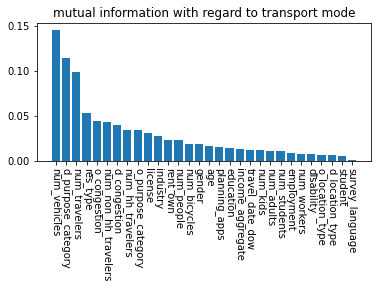

In [28]:

plt.bar(mutual_info_mode_df['feature_name'], mutual_info_mode_df['mutual_information'])
plt.xticks(rotation=270)
plt.title('mutual information with regard to transport mode')
plt.subplots_adjust(bottom=0.4)
plt.savefig('image/mutual_info_mode.eps')


# Merging features

In [26]:
df_test = pd.read_csv('data/data_processed_test.csv')# covert string values to categorial codes
string_cols = ['survey_language', 'disability']
df_test[string_cols] = df_test[string_cols].astype('category')
df_test[string_cols] = df_test[string_cols].apply(lambda x: x.cat.codes)

## Age
Merge age into three bins: under 24, 25-64, 65+

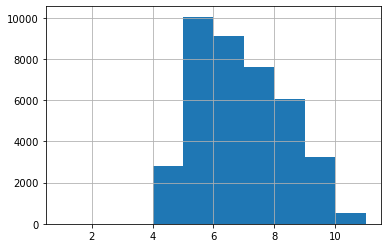

In [27]:
# age
df['age'].hist(bins=[1,2,3,4,5,6,7,8,9,10,11])

def merge_age(df):
    df_cut = pd.cut(df['age'], bins=[0, 4, 8, 11], labels=False)
    df['age_merged'] =  pd.cut(df['age'], bins=[0, 4, 8, 11], labels=False)


merge_age(df)
merge_age(df_test)


## Income
merge income aggregate into three bins:
    under 25k, 25-75k, 75k+

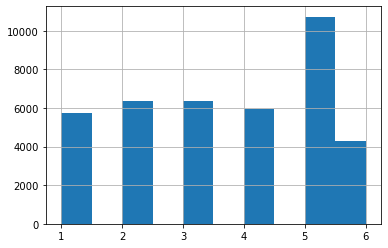

In [28]:
df['income_aggregate'].hist()

def merge_income(df):
    df['income_aggregate_merged'] = pd.cut(df['income_aggregate'], bins=[0, 2, 4, 6], labels=False)

merge_income(df)
merge_income(df_test)

## res_type
old categories:
- 1: Single-family house (detached house)
- 2: Single-family townhouse (attached to other houses)
- 3: Building with 2-4 units (duplexes, triplexes, quads)
- 4: Building with 5-9 apartments
- 5: Building with 10-59 apartments
- 6: Building with 60 or more apartments
- 7: Senior or age-restricted apartments
- 8: Dorm, group quarters, or institutional facility
- 9: Manufactured home/mobile home/trailer

new categories:
- 0: 1&2
- 1: 3&4
- 2: 5&6
- 3: 7&8&9

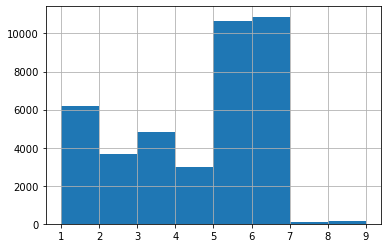

In [29]:
df['res_type'].hist(bins=range(1,10))

def merge_res_type(df):
    df['res_type_merged'] = pd.cut(df['res_type'], bins=[0, 2, 4, 6, 9], labels=False)
    
merge_res_type(df)
merge_res_type(df_test)

## education:
old categories:
- 1: Less than high school
- 2: High school graduate/GED
- 3: Some college
- 4: Vocational/technical training
- 5: Associate degree
- 6: Bachelor's degree
- 7: Graduate/post-graduate degree

new categories:
- 0: 1-5
- 1: 6
- 2: 7

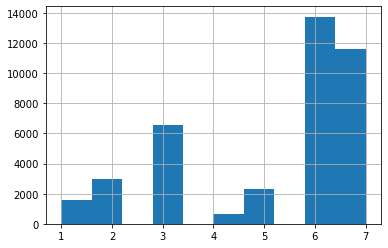

In [30]:
df['education'].hist()

def merge_edu(df):
    df['education_merged'] = pd.cut(df['education'], bins=[0, 5, 6, 7], labels=False)

merge_edu(df)
merge_edu(df_test)

## Day of week
merge into two categories:
- 0: weekday (1-5)
- 1: weekend (6-7)


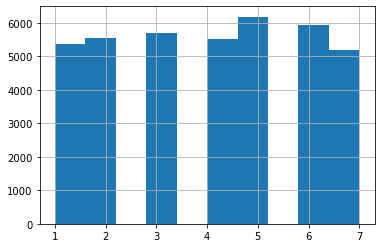

In [31]:
df['travel_date_dow'].hist()

def merge_dow(df):
    df['travel_date_dow_merged'] = pd.cut(df['travel_date_dow'], bins=[0, 5, 7], labels=False)

merge_dow(df)
merge_dow(df_test)

# Re-evaluate feature importance on the merged features

In [32]:
candidate_cols = [
    'travel_date_dow',
    'o_purpose_category',
    'd_purpose_category',
    'num_non_hh_travelers',
    'num_hh_travelers',
    'num_travelers',
    'o_location_type',
    'd_location_type',
    'o_congestion',
    'd_congestion',
    'age',
    'employment',
    'student',
    'license',
    'planning_apps',
    'industry',
    'gender',
    'education',
    'survey_language',
    'num_bicycles',
    'num_vehicles',
    'res_type',
    'rent_own',
    'income_aggregate',
    'num_people',
    'num_adults',
    'num_kids',
    'num_workers',
    'num_students',
    'disability',

    'age_merged',
    'income_aggregate_merged',
    'res_type_merged',
    'education_merged', 
    'travel_date_dow_merged'
]

In [33]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

X = df[candidate_cols].to_numpy()
y = df['trip_distance_category']
mutual_info = mutual_info_classif(X, y, discrete_features=True)

zipped = list(zip(candidate_cols, mutual_info))
zipped.sort(key=lambda x: x[1], reverse=True)
pd.DataFrame(zipped, columns=['feature_name', 'mutual_information'])

,feature_name,mutual_information
0,d_congestion,0.019314
1,d_purpose_category,0.017436
2,num_vehicles,0.016333
3,res_type,0.009415
4,res_type_merged,0.008242
5,o_purpose_category,0.006580
6,income_aggregate,0.005044
7,rent_own,0.004670
8,license,0.004557
9,num_travelers,0.003183


In [36]:
df.to_csv('data/data_processed_train_merged.csv', index=False)

In [37]:
df_test.to_csv('data/data_processed_test_merged.csv', index=False)